In [1]:
import pandas as pd

In [2]:
trips = pd.read_csv('data/trips.csv')

In [3]:
trips

,activityid,personid,modechoice
0,1,3,WALK
1,2,3,WALK
2,3,3,WALK
3,4,3,WALK
4,5,3,WALK
...,...,...,...
14047024,17147588,4113994,DRIVE_ALONE_FREE
14047025,17147589,4113994,DRIVE_ALONE_FREE
14047026,17147590,4113994,DRIVE_ALONE_FREE
14047027,17147592,4113995,SHARED_3_HOV


In [4]:
trips['modechoice'].value_counts()

DRIVE_ALONE_FREE    6156506
SHARED_2_HOV        3507285
SHARED_3_HOV        2814408
WALK                1022834
WALK_SET             214366
SCH_BUS              194123
BIKE                  69645
SHARED_3_PAY          17088
SHARED_2_PAY          15450
KNR_SET               13633
PNR_SET               11926
DRIVE_ALONE_PAY        9765
Name: modechoice, dtype: int64

In [5]:
utilityvars = pd.read_csv('data/utilityvars.csv')

In [6]:
utilityvars

,activityid,age,gender,autosuf,numhouseholdpersons,income,oduden,oempden,ototint,dempden,...,parkingwalktime,sovcost,hovcost,tollcost,tourpurpose,tourmode,firststop,laststop,zerototalstops,targettripmode
0,12150818,4,True,2,2,4,9.633200,11.594058,4.0,67.659134,...,0.0,46.447229,46.447229,46.447229,0,5,True,False,False,1
1,3018709,6,False,2,2,1,8.304700,70.117912,12.0,32.273338,...,0.0,495.225231,495.225231,495.225231,0,1,False,False,False,1
2,8809200,6,False,2,6,3,10.189500,47.538746,3.0,13.567157,...,0.0,462.137117,462.137117,462.137117,0,1,False,False,True,1
3,11332534,4,False,2,1,2,13.393200,21.983759,4.0,51.544109,...,0.0,342.291418,342.291418,342.291418,0,1,False,False,False,1
4,6130767,6,False,2,3,2,13.274000,6.568953,3.0,8.480003,...,0.0,310.186071,310.186071,310.186071,0,1,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14047024,10138525,2,True,2,4,2,35.460899,286.328949,14.0,12.385718,...,0.0,842.672156,842.672156,842.672156,5,5,False,False,False,5
14047025,16270294,7,False,2,4,3,17.207199,19.868286,13.0,1.423494,...,0.0,13.350623,13.350623,13.350623,5,3,False,False,False,3
14047026,16270295,7,False,2,4,3,16.574200,1.423494,13.0,88.151642,...,0.0,137.377041,137.377041,137.377041,5,3,False,False,False,3
14047027,10138526,2,True,2,4,2,22.916100,12.385718,14.0,8.472905,...,0.0,5.447711,5.447711,5.447711,5,5,False,False,False,3


In [7]:
utilityvars.isnull().sum()

activityid               0
age                      0
gender                   0
autosuf                  0
numhouseholdpersons      0
income                   0
oduden                   0
oempden                  0
ototint                  0
dempden                  0
sovdrivetime             0
hovdrivetime             0
tolldrivetime            0
tollcostsov              0
tollcosthov2             0
tollcosthov3             0
walkttime                0
walktotransitutility     0
drivetotransitutility    0
parkingcost              0
parkingwalktime          0
sovcost                  0
hovcost                  0
tollcost                 0
tourpurpose              0
tourmode                 0
firststop                0
laststop                 0
zerototalstops           0
targettripmode           0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

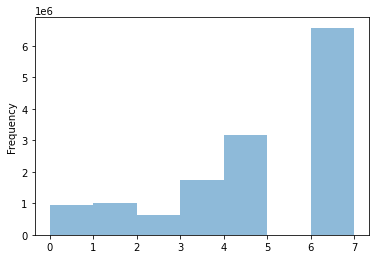

In [8]:
utilityvars['age'].plot.hist(bins=7, alpha=0.5)

In [9]:
utilityvars['age'].value_counts()
# we see that most people are aged 56+, followed by the age group between 25-55
# so we have little representation of the younger age group

7    3754099
4    3165495
6    2818493
3    1743774
1     994808
0     955376
2     614984
Name: age, dtype: int64

In [10]:
# activityid can be removed because it just identifies each person, not relevant for our prediction

In [11]:
utilityvars['gender'].value_counts()
# we have around 1.2 million more females than males 

True     7630493
False    6416536
Name: gender, dtype: int64

In [12]:
utilityvars['autosuf'].value_counts()
# most common is unsufficient vehicle count, following sufficient count, and little households that don't have vehicle

1    7330371
2    6556605
0     160053
Name: autosuf, dtype: int64

In [13]:
utilityvars['income'].value_counts()
# distribution of income seems relatively like normal distribution
# 3 is the average of $60-100k

3    3182876
2    3170265
1    2701888
5    2643779
4    2348221
Name: income, dtype: int64

In [14]:
utilityvars['tourpurpose'].value_counts()
# work, escort, discretionary are most common purposes of the tour
# university and work-based is the least common

0    3594540
5    3489898
4    2832591
2    1650401
3    1570662
7     425017
1     302898
6     181022
Name: tourpurpose, dtype: int64

In [15]:
utilityvars['tourmode'].value_counts()
# driving is the most common tour modes, with park and ride and kiss and ride are least common

1     4999579
3     3891056
5     3759115
7      842413
9      235085
12     137256
8      107159
11      57661
10      17705
Name: tourmode, dtype: int64

In [16]:
utilityvars['targettripmode'].value_counts()

1     6155225
3     3523141
5     2831163
7     1003774
9      213502
12     137256
8      107159
11      24315
2       20494
6       11328
10      10074
4        9598
Name: targettripmode, dtype: int64

In [17]:
# use weights on tourmode, which will weight more on walk time - 
# could show how much more inconvenient it is to walk/not
utilityvars.sample(n=50000, weights='walkttime', random_state=1)

,activityid,age,gender,autosuf,numhouseholdpersons,income,oduden,oempden,ototint,dempden,...,parkingwalktime,sovcost,hovcost,tollcost,tourpurpose,tourmode,firststop,laststop,zerototalstops,targettripmode
5765990,1669163,7,False,2,2,3,4.953200,4.424497,8.0,34.916939,...,0.0,124.246268,124.246268,124.246268,5,3,False,False,False,3
10197295,3975311,3,False,2,5,4,19.268801,117.837265,13.0,319.509674,...,0.0,921.638728,921.805627,921.638728,0,1,False,False,False,1
714,6111824,3,False,1,2,2,11.703000,24.352190,3.0,34.791630,...,0.0,80.999723,80.999723,80.999723,2,1,False,False,True,1
3921242,16977736,7,True,1,2,5,5.558900,10.919112,12.0,10.224158,...,0.0,65.668333,65.668333,65.668333,7,7,True,False,False,1
1679428,16473962,3,False,2,1,1,1.160300,141.827942,17.0,61.009068,...,0.0,27.187656,27.187656,27.187656,1,1,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9300289,13627002,4,False,2,2,5,2.066800,27.348284,10.0,3.799550,...,0.0,253.746636,253.746636,253.746636,0,1,False,False,False,1
12879983,7131104,7,True,2,1,3,2.100100,7.162939,2.0,16.391285,...,0.0,299.233020,299.389806,299.233020,0,1,False,False,False,1
6920109,4248838,7,False,1,2,4,3.274100,10.970346,27.0,192.898834,...,0.0,343.241054,343.241054,343.241054,0,1,False,False,True,1
5772311,2205872,3,False,2,4,2,11.616200,25.322632,6.0,507.650848,...,0.0,262.606049,262.606049,262.606049,2,3,False,False,False,3


In [29]:
mode1 = utilityvars[utilityvars['targettripmode']==1].sample(n=1000, weights='walkttime', random_state=1)

In [30]:
mode2 = utilityvars[utilityvars['targettripmode']==2].sample(n=1000, weights='walkttime', random_state=1)

In [31]:
mode3 = utilityvars[utilityvars['targettripmode']==3].sample(n=1000, weights='walkttime', random_state=1)
mode4 = utilityvars[utilityvars['targettripmode']==4].sample(n=1000, weights='walkttime', random_state=1)
mode5 = utilityvars[utilityvars['targettripmode']==5].sample(n=1000, weights='walkttime', random_state=1)
mode6 = utilityvars[utilityvars['targettripmode']==6].sample(n=1000, weights='walkttime', random_state=1)
mode7 = utilityvars[utilityvars['targettripmode']==7].sample(n=1000, weights='walkttime', random_state=1)
mode8 = utilityvars[utilityvars['targettripmode']==8].sample(n=1000, weights='walkttime', random_state=1)
mode9 = utilityvars[utilityvars['targettripmode']==9].sample(n=1000, weights='walkttime', random_state=1)
mode10 = utilityvars[utilityvars['targettripmode']==10].sample(n=1000, weights='walkttime', random_state=1)
mode11 = utilityvars[utilityvars['targettripmode']==11].sample(n=1000, weights='walkttime', random_state=1)
mode12 = utilityvars[utilityvars['targettripmode']==12].sample(n=1000, weights='walkttime', random_state=1)

In [32]:
combined_subsamples = pd.concat([mode1,mode2,mode3,mode4,mode5,mode6,mode7,mode8,mode9,mode10,mode11,mode12], axis=0)

In [33]:
combined_subsamples

,activityid,age,gender,autosuf,numhouseholdpersons,income,oduden,oempden,ototint,dempden,...,parkingwalktime,sovcost,hovcost,tollcost,tourpurpose,tourmode,firststop,laststop,zerototalstops,targettripmode
5420299,5933728,7,True,2,2,2,15.0496,6.528248,3.0,28.221581,...,0.0,324.256782,324.256782,324.256782,4,1,False,False,True,1
10137151,14562853,3,False,2,5,4,3.4107,230.852676,22.0,27.689655,...,0.0,298.718978,298.718978,298.718978,0,1,False,False,True,1
459,13897599,6,False,1,5,5,7.3797,4.521993,1.0,137.408112,...,0.0,547.682008,547.825087,547.682008,0,1,False,False,False,1
3523186,5757716,7,False,1,2,4,6.2555,31.995995,1.0,6.055996,...,0.0,133.193759,133.193759,133.193759,3,1,False,False,False,1
1389833,9001967,7,False,2,1,2,13.1061,80.675232,3.0,24.416708,...,0.0,224.655784,224.655784,224.655784,4,1,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649022,5565944,1,False,2,5,5,3.6818,46.511749,1.0,90.145737,...,0.0,54.237525,54.237525,54.237525,2,12,False,False,True,12
1014748,11693791,1,True,1,4,4,7.7022,19.270676,12.0,42.764721,...,0.0,24.051633,24.051633,24.051633,2,12,False,False,True,12
409363,512651,3,False,2,5,1,5.6995,14.991196,10.0,46.152000,...,0.0,303.820963,303.820963,303.820963,2,12,False,False,True,12
1561740,101043,1,True,1,3,2,6.4687,20.669909,8.0,19.647785,...,0.0,149.543022,149.543022,149.543022,2,12,False,False,True,12


In [25]:
utilityvars['targettripmode']

0           1
1           1
2           1
3           1
4           1
           ..
14047024    5
14047025    3
14047026    3
14047027    3
14047028    5
Name: targettripmode, Length: 14047029, dtype: int64

In [18]:
# try sampling 1000 for each travel choice mode 
# if we sample everyone uniform then we will have equal weights for each trip mode
# this is how data can have bias 
# disadvantage - we don't want to throw away samples during subsample 
# potential for fitting noise - if we add to much weight to something under represented 

In [19]:
# breakdown between people who take HOV lanes, and people who don't 

In [20]:
# ask about trips.csv and the last column from utility vars 
# check per person accuracy, is there variety per persion 
# population by income ex. - is the model equitable? 
###for income and how it affects travel mode choice - for ppl in low income areas 
# write a pipeline and research that 
# build validation pipleine, things to look for